In [1]:
%matplotlib Widget

import sampling
import modeling

import importlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spec
from tqdm import tqdm

plt.style.use("bmh")

tau = np.pi*2

100%|██████████| 8/8 [00:00<00:00, 20.61it/s]


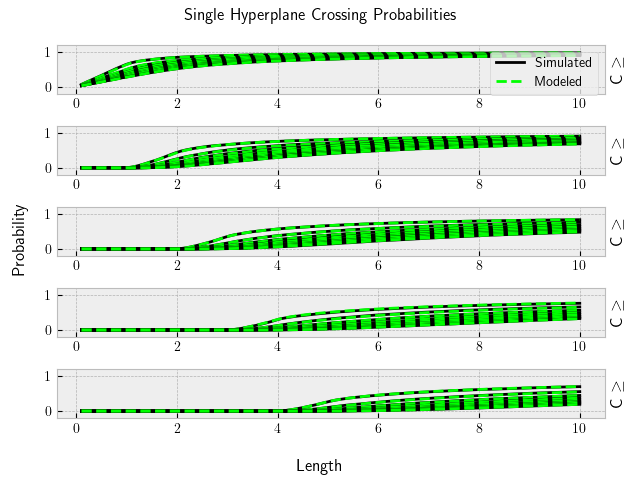

In [5]:
# Probability Given a single set of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 10000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0.1, 10, 101)
hyperplanes = 1
spacing = np.array([1])
Cs = np.arange(5)+1

plt.rc('text', usetex=True)
fig, axs = plt.subplots(len(Cs))
for c, ax in zip(Cs, axs):
    for dim in tqdm(dims):
        sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
        ax.plot(lengths, sim_probs, "k")

        probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
        ax.plot(lengths, probabilities, "--", color=(0,1,0))

        ax.set_ylim([-0.2, 1.2])
        ax.set_ylabel(r'C $\ge$ ')
        ax.yaxis.set_label_position("right")

    if c == 1:
        ax.legend(["Simulated", "Modeled"])
fig.supylabel("Probability")
fig.supxlabel("Length")
fig.suptitle("Single Hyperplane Crossing Probabilities")
plt.tight_layout()

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (91,) (90,) 

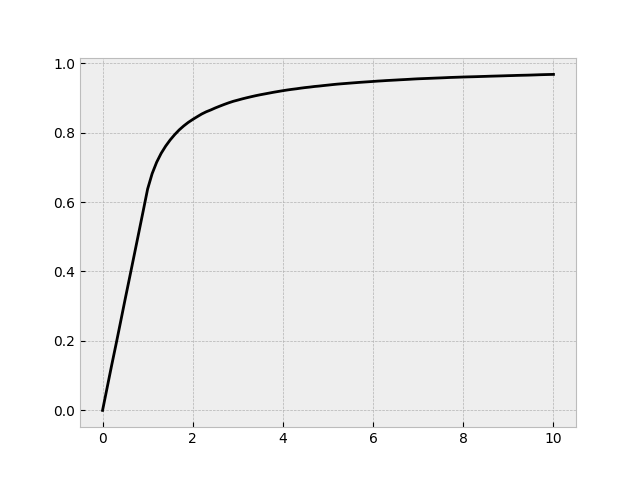

In [130]:
# Probability Given multiple sets of hyperplanes
importlib.reload(sampling)
importlib.reload(modeling)

samples = 100000
dims = np.arange(2, 10, 1)
lengths = np.linspace(0, 10, 101)
hyperplanes = 1
spacing = np.array([1])
c = 1

fig, ax = plt.subplots()
for idx, dim in enumerate(tqdm(dims)):

    sim_probs = sampling.get_sim_prob_ge(samples, dim, lengths, c, hyperplanes, spacing)
    ax.plot(lengths, sim_probs, "k")

    probabilities = modeling.prob_of_crossing_vs_length(lengths, dim, c, hyperplanes, spacing)
    ax.plot(lengths, probabilities, "--", color=(0,1,0))

    r_ml = lengths[lengths<=min(spacing)]
    if dim%2 == 0:
        modeled_prob_m = r_ml/spacing[0]/np.pi*spec.beta(dim/2, 0.5) + r_ml/spacing[1]/np.pi*spec.beta(dim/2, 0.5) - 2*r_ml**2/np.pi/dim/spacing[0]/spacing[1]
    # else:
    #     modeled_prob_m = r_ml/spacing[0]/np.pi*spec.beta(dim/2, 0.5) + r_ml/spacing[1]/np.pi*spec.beta(dim/2, 0.5) - 2**1.5*r_ml**2/np.pi**1.5/dim/spacing[0]/spacing[1]
    ax.plot(r_ml, modeled_prob_m)

    if idx==0:
        ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
        ax.legend(["Simulated", "Modeled"])
    # ax.plot(lengths[lengths<1], lengths[lengths<1]*spec.gamma(dim/2)/spec.gamma(0.5)/spec.gamma(dim/2+0.5))
        
ax.text(lengths[-1], sim_probs[-1], f" {dim}D", verticalalignment="center")
ax.set_xlabel("Length of Needle")
ax.set_ylabel("Probability")
# ax.set_title("Simulated and Modeled Probability \nof at least a Single Crossing in Multiple Dimensions")


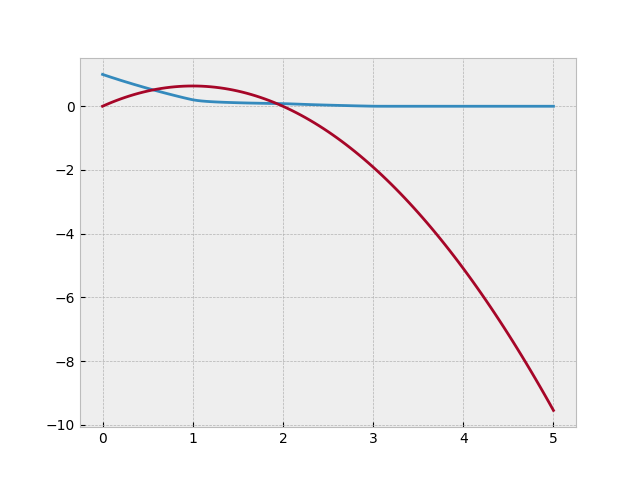

In [121]:
importlib.reload(sampling)
# multi-spacing debug
np.random.seed(1)
samples = 100000
dim = 2
hyperplanes = 2
spacing = np.array([1,3])
# spacing = np.ones(hyperplanes)
length = np.linspace(0, 5, 101)

# xs = np.random.random((samples, dim))
# hypersphere = sampling.get_samples_gaussian(samples, dim)
# ys = xs + length * hypersphere
# print(ys)
# print(ys/spacing[None,:])

# intersections = 0
# for y in ys:
#     if y[0]>spacing[0] or y[0]<0 or y[1]>spacing[1] or y[1]<0:
#         intersections += 1
# probability = intersections / samples
# print(probability)

fig, ax = plt.subplots()
ax.plot(length, sampling.get_sim_prob_e(samples, dim, length, 0, hyperplanes, spacing))
# print((2*length*np.sum(spacing)-length**2)/(np.pi*np.prod(spacing)))
ax.plot(length, 4/np.pi * (length-0.5*length**2))

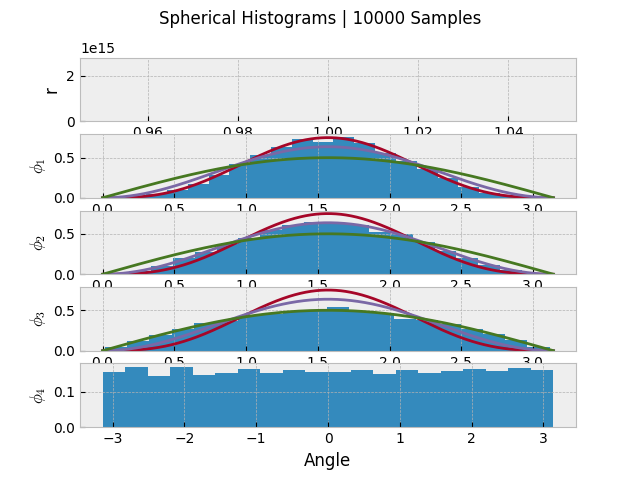

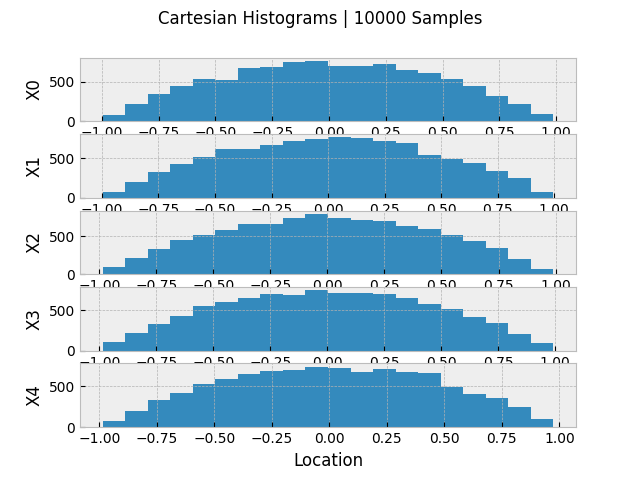

In [35]:
importlib.reload(sampling)
hypersphere = sampling.get_samples_gaussian(n_samples=10000, n_dims=5)
spherical_coords = sampling.cartesian_to_spherical(hypersphere)
sampling.plot_spherical_histograms(spherical_coords)
cartesian_coords = sampling.spherical_to_cartesian(spherical_coords)
sampling.plot_cartesian_histograms(cartesian_coords)